### Lab 6:

Project completed on bioe131.com server

#### Step 1: Align reads to human genome to detect contamination

Database to align to: /data/hg19/hg19
--un unaligned.fastq used. "unaligned.fastq" contains assumed pure S. oneidensis reference genome

Input message: be131-40@meowth:~$ bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S output1.sam --un unaligned.fastq

Output message: 1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate

Contaminating Human DNA forms about 8.57% of our reads.

#### Step 2: Align reads to Shewanella genome

Database to align to: /data/lab6/shewanella_oneidensis_mr-1

Input message: be131-40@meowth:~$ bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -S filtered_output0.sam  --un filtered_unaligned.fastq

Output message: 1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate

filtered_unaligned.fastq contains the assumed pure Shewanella oneidensis reads that the alignment program didn't align to the genome. In theory, these could be contaminating reads from another species but it is far more likely that these reads weren't aligned due to the low sensitivity of the alignment run (i.e. by use of the --very-fast option)

According to output message: 29.13% of the S. oneidensis genome didn't align to the reads we used. 

Lets try to re-run the above alignment using --very-sensitive this time.

Input message: bowtie2 -p 4 --very-sensitive --no-unal -x /data/lab6/shewanella_s_mr-1 -U unaligned.fastq -S filtered_output0.sam  --un filtered_unaligned.fastq


Output message: 1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    298112 (28.99%) aligned 0 times
    688180 (66.92%) aligned exactly 1 time
    42087 (4.09%) aligned >1 times
71.01% overall alignment rate

According to output message: 28.99% of the S. oneidensis genome didn't align to the reads we used. The percentage of aligned reads decreased, but not by much. 

This indicates that it is probably not the program's sensitivity but it could be that this Shewanella sequencing run was error-prone, or that this Shewanella culture had genomes that had diverged significantly from the reference genome, or that there is contamination by something else other than humans. 

#### Step 3: Generate a coverage plot

SAM File: filtered_output0.sam  
BAM File it was converted to: filtered_output0_bam.bam  
Sorted and Indexed BAM file: filtered_output0_bam.sorted.bam  
Tab file containing position v depth information: pileup0.tab

In [1]:
import csv
posn = []
depth = []
with open('pileup0.tab') as csvfile: 
    students_reader = csv.reader(csvfile, delimiter='\t')
    for row in students_reader:
        posn.append(int(row[1]))
        depth.append(int(row[2]))
        

In [2]:
import numpy as np

print("Minimum coverage %d, Maximum Coverage %d, Mean Coverage %d" %(min(depth),max(depth),np.mean(depth)))

Minimum coverage 1, Maximum Coverage 281, Mean Coverage 37


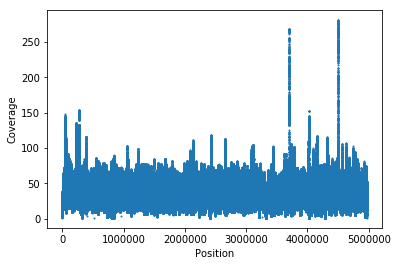

In [6]:
import matplotlib.pyplot as plt

plt.scatter(posn, depth, s=(1 ** 2))
plt.xlabel("Position")
plt.ylabel("Coverage")
plt.show()

In [4]:
countdepth = {} #key:value pairs are depth:count 
for i in range(len(posn)):
    if depth[i] in countdepth.keys():
        countdepth[depth[i]] += 1
    else:
        countdepth[depth[i]] = 1

#print(countdepth)
    

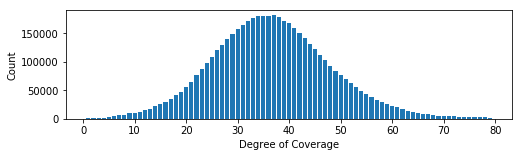

In [5]:
countdepthls = [(k,v) for k,v in countdepth.items()] #tuple pairs are [depth, count] 
countdepthls.sort()

#print (countdepthls)

x = [thing[0] for thing in countdepthls if thing[0] < 80] #the limit of 170 is only for the purpose of meaking the plot look nicer
hts = [thing[1] for thing in countdepthls if thing[0] < 80]
wid = 0.3

plt.figure(figsize=(8,2))
plt.bar(x, hts)
plt.xlabel("Degree of Coverage")
plt.ylabel("Count")
plt.show()